**- We import `pandas` to read and work with datasets**

**- We use `pyplot` from `matplotlib` to draw graphs**

**- We import linear_model from `sklearn` (a machine learning library) to use linear regression and predict a dependent variable based on an independent variable:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

**This cell reads `homeprices.csv` and stores it in a DataFrame namely `df`. Then, it shows `df`:**


In [2]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


**This code prepares the feature(s) (X) needed for machine learning model. Here, area is treated as the independent variable (feature) for training a model.**

**Selects the `area` column from `df` as a DataFrame itself (with double brackets `[[]]` to keep it as a DataFrame, not a Series):**

In [3]:
X = df[['area']]
X

,area
0,2600
1,3000
2,3200
3,3600
4,4000


**In machine learning, `y` usually represents the target/output variable (the value the model is trying to predict). Here, price is the dependent variable based on area.**

**Selects the `price` column from the DataFrame df and stores this column in the variable `y`:**

In [4]:
y = df.price
y

,price
0,550000
1,565000
2,610000
3,680000
4,725000


**This code creates a scatter plot to show the relationship between area (x-axis) and price (y-axis):**

Text(0, 0.5, 'price (US $)')

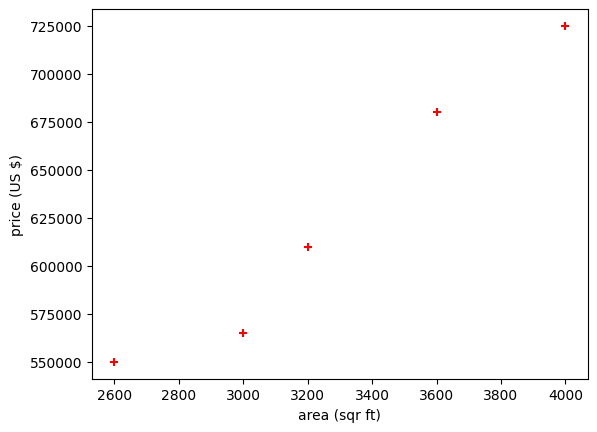

In [5]:
plt.scatter(X, y, color='r', marker='+')
plt.xlabel('area (sqr ft)')
plt.ylabel('price (US $)')

**1- Creates an instance of a linear regression model. The model will learn a linear relationship between the input (`X`) and the output (`y`).**

**2- reg.fit(X, y):This method trains the model by finding the best-fitting line that minimizes the error between the predicted and actual values. This code trains the model to understand the relationship between house area and price using a linear equation.**

**The model is now ready to make predictions based on the learned relationship:**

In [6]:
reg = linear_model.LinearRegression()
reg.fit(X, y)

LinearRegression()

**This line predicts the house price for a given area (3500 sq ft). The model uses the relationship it learned during training to provide an estimated price:**

In [7]:
reg.predict([[3500]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([655873.28767123])

**This line accesses the coefficients(slope or `m` in `y=mx+b`) of the trained linear regression model:**

In [8]:
reg.coef_

array([135.78767123])

**This line accesses the intercept(the value of y when x  is 0 or `b` in `y=mx+b`) of the trained linear regression model:**

In [9]:
reg.intercept_

180616.43835616432

**Now if we put the value that we take for intercept and coefficient of model in `y=mx+b` equation for `x=3500`, we could see it gives us the exact predicted value that it gave us:**

In [10]:
135.78767123 * 3500 + 180616.43835616432

655873.2876611643

**This code visualizes the actual data points (scatter plot) and the linear regression line (predicted values) to show how well the model fits the data. The green line represents the model's prediction of price based on the area, and the red `+` markers represent the actual data points:**

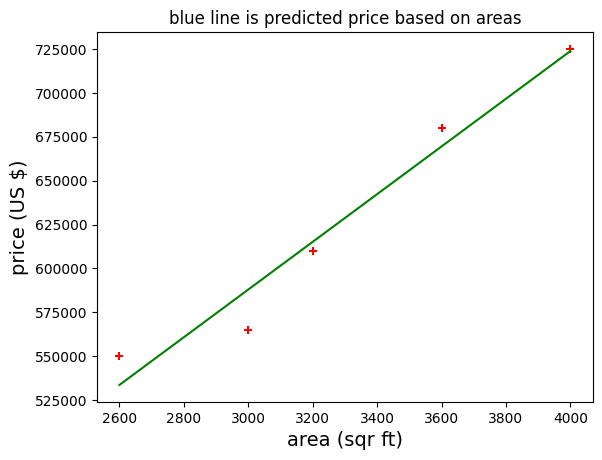

In [11]:
plt.scatter(X, y, color='r', marker='+')
plt.plot(X, reg.predict(X), color='g')
plt.title('blue line is predicted price based on areas')
plt.xlabel('area (sqr ft)', fontsize=14)
plt.ylabel('price (US $)', fontsize=14)
plt.show()

**This code loads a new dataset called areas.csv into the variable `df_areas`, which we want to give the areas to our model to predict the price:**

In [12]:
df_areas = pd.read_csv('areas.csv')
df_areas

,area
0,1000
1,1500
2,2000
3,2550
4,4100
5,4555
6,1234
7,5000
8,6000
9,7000


**This code generates predicted house prices based on the areas provided in `df_areas`, using the linear regression model, and stores these predictions in the `price` column of the `df_areas` DataFrame:**

In [13]:
predicted_price = reg.predict(df_areas)
df_areas['price'] = predicted_price
df_areas

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2000,4.521918e+05
3,2550,5.268750e+05
4,4100,7.373459e+05
5,4555,7.991293e+05
6,1234,3.481784e+05
7,5000,8.595548e+05
8,6000,9.953425e+05
9,7000,1.131130e+06


**This code visualizes the predicted house prices for new area data. The red `*` markers show individual predictions, and the blue line connects them to show the overall trend:**

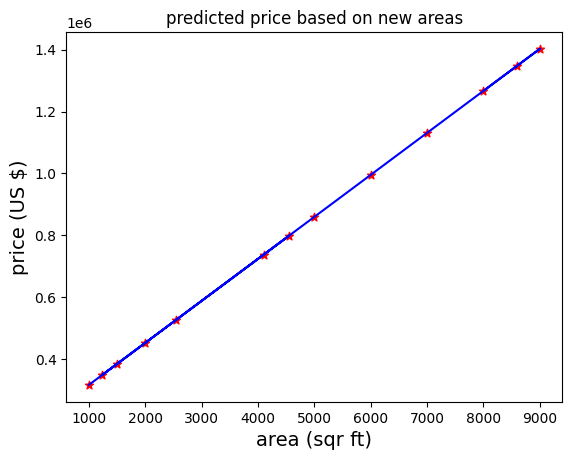

In [14]:
plt.scatter(df_areas.area, predicted_price, color='r', marker='*')
plt.plot(df_areas.area, predicted_price, color='b')
plt.title('predicted price based on new areas')
plt.xlabel('area (sqr ft)', fontsize=14)
plt.ylabel('price (US $)', fontsize=14)
plt.show()

**This line exports the data, including the area values and their predicted prices, to a CSV file:**

In [15]:
df_areas.to_csv("predicted_price.csv", index=False)